# DSC180A Causal Discovery of Remote Work and Mental Health
group members: Evelyn, Vivan, Jason, Yishan

In [7]:
!pip install causal-learn
!pip install --upgrade matplotlib

## Setup

In [ ]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.PC import pc
import matplotlib.pyplot as plt
import networkx as n
import seaborn as sns

In [ ]:
data = pd.read_csv("data.csv")

# EDA for association

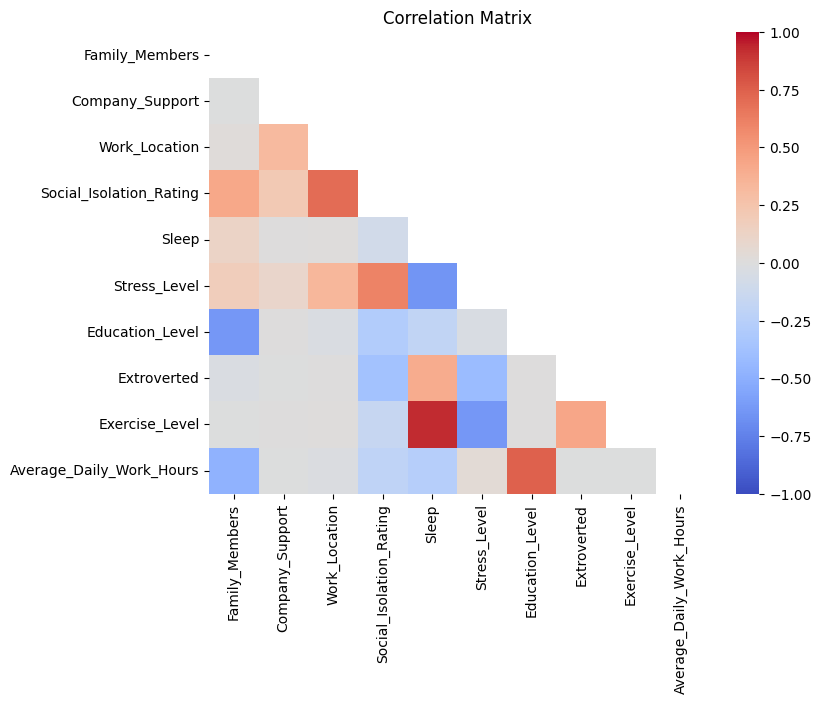

In [13]:
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Algorithm

## PC algorithm

In [14]:
new_data = data.drop(columns = {'Education_Level', 'Extroverted'}, axis = 1)
new_data

,Family_Members,Company_Support,Work_Location,Social_Isolation_Rating,Sleep,Stress_Level,Exercise_Level,Average_Daily_Work_Hours
0,1,4,1,1.000000,4.000000,1.000000,4.000000,7.578096
1,0,2,1,1.000000,1.169698,2.223155,0.393816,11.063991
2,1,1,1,1.000000,3.477512,1.000000,2.438587,9.803443
3,3,1,1,1.000000,3.614454,1.000000,2.324262,8.425012
4,0,3,3,3.293175,3.241105,2.404578,2.866853,12.750483
...,...,...,...,...,...,...,...,...
4995,1,4,2,2.356483,2.559473,2.006536,2.145069,12.592046
4996,0,5,1,1.000000,4.000000,1.000000,4.000000,10.009057
4997,0,1,2,1.384344,1.494679,2.502712,0.729818,11.113678
4998,3,3,1,1.000000,4.000000,1.000000,3.289979,10.049100


### PC (0.01 kci)

Depth=2, working on node 7: 100%|██████████| 8/8 [4:33:18<00:00, 2049.86s/it]  


Green: undirected; Blue: directed; Red: bi-directed



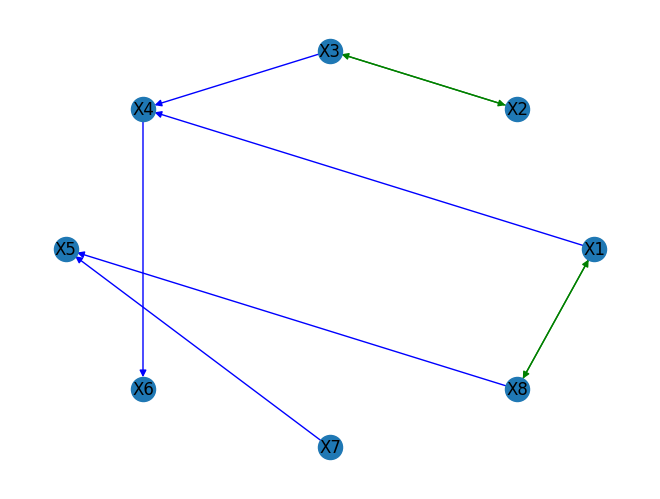

In [ ]:
alpha = 0.01 
indep_test = "kci" 
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

1.'Family_Members'
2.'Company_Support'
3.'Work_Location'
4.'Social_Isolation_Rating'
5.'Sleep'
6.'Stress_Level'
7.'Exercise_Level'
8.'Average_Daily_Work_Hours'

528minutes

## PC (0.05 kci)

Depth=3, working on node 7: 100%|██████████| 8/8 [05:52<00:00, 44.09s/it]      


Green: undirected; Blue: directed; Red: bi-directed



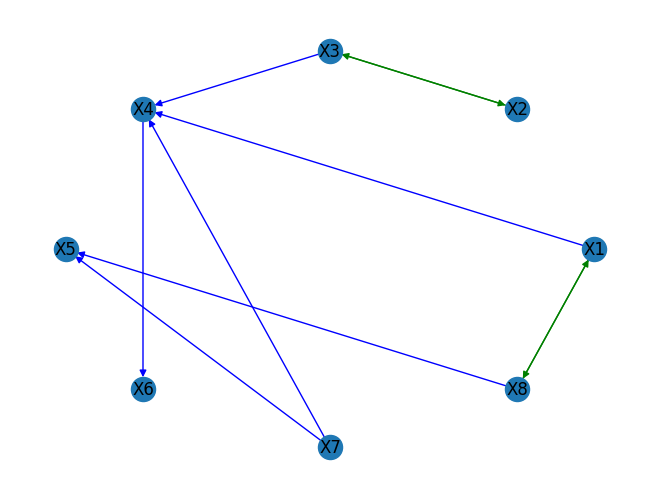

In [ ]:

alpha = 0.05 
indep_test = "kci" 
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

590minutes

## PC (0.01 fisherz)

Depth=3, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 837.54it/s] 


Green: undirected; Blue: directed; Red: bi-directed



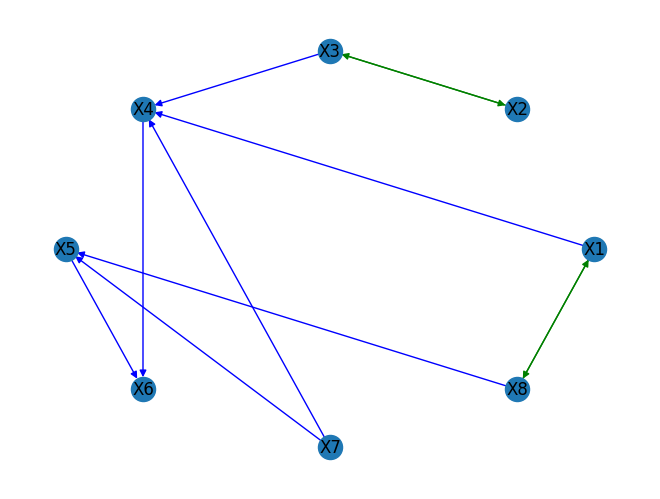

In [ ]:
# Define default or example values for parameters
alpha = 0.01  # Common threshold for independence testing 
indep_test = "fisherz"  # Typically 'fisherz' for continuous data
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True  # Show progress in long runs

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [10]:
new_data.columns

Index(['Family_Members', 'Company_Support', 'Work_Location',
       'Social_Isolation_Rating', 'Sleep', 'Stress_Level', 'Exercise_Level',
       'Average_Daily_Work_Hours'],
      dtype='object')

1.'Family_Members'
2.'Company_Support'
3.'Work_Location'
4.'Social_Isolation_Rating'
5.'Sleep'
6.'Stress_Level'
7.'Exercise_Level'
8.'Average_Daily_Work_Hours'